In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Complete CNN Concept (A to Z)

**Print all directories and subdirectories in '/kaggle/input' where data is stored**

In [2]:
import os   ## Importing the os module for interacting with the operating system
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

/kaggle/input
/kaggle/input/dog-vs-cat
/kaggle/input/dog-vs-cat/animal
/kaggle/input/dog-vs-cat/animal/dog
/kaggle/input/dog-vs-cat/animal/cat


# **Train-Test Data Split for Large Image Datasets Using Keras**

When working with large image datasets, loading all images into memory at once can be impossible due to limited RAM. For example, a dataset of images could take up 12GB or 18GB of memory, which many computers cannot handle at once. To overcome this, instead of using traditional methods like loading the data into a Pandas DataFrame and spliting in train and test), we use Keras to load and split the data in batches, minimizing memory usage.

Keras provides built-in tools, such as **keras.utils.image_dataset_from_directory and tf.keras.preprocessing.image.ImageDataGenerator**,(We will cover both library in details) that can help you efficiently load and split your data into training and testing sets without overwhelming your system's memory.

These tools work using **Python generator concept**. A generator is a special type of function that does not return all the data at once. Instead, it "yields" batches of data. The generator keeps track of its position in memory, so it knows where it left off and can continue from there the next time we call it. This is different from a regular function that returns all the data at once and forgets everything when it finishes.

By using Keras's data generators, you can load only small batches of images into memory at a time, reducing the memory burden on your system and making it possible to work with very large datasets. 

**Note:** If you prefer the traditional method, you can utilize my Kaggle notebook linked below, which will help you create a DataFrame or we can create own genrater function using "os" module as well. However, I recommend using Keras' pre-built generators to ensure better performance and minimize memory usage.

**Link:** https://www.kaggle.com/code/mahipalkumarsingh/pca-analysis-of-cat-vs-dog

# **1. Using : keras.utils.image_dataset_from_directory**

In [3]:
import tensorflow as tf

# I am specifying the directory where the images of cats and dogs are stored.
directory = '/kaggle/input/dog-vs-cat/animal'

# Spliting the data into training sets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",             # Automatically infer labels based on folder names
    label_mode="int",              # This will label 0 for cats and 1 for dogs
    batch_size=32,                 # Number of images per batch
    image_size=(256, 256),         # Resize all images to 256x256
    validation_split=0.2,          # This parameter reserve 20% of the data for validation
    subset="training",             # This is the training subset
    color_mode="rgb",              # Keep RGB color channels
    seed=42,                       # Seed for reproducibility
)

Found 1000 files belonging to 2 classes.
Using 800 files for training.


In [4]:
# Validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",             # Automatically infer labels based on folder names
    label_mode="int",              # This will label 0 for cats and 1 for dogs
    batch_size=32,                 # Number of images per batch
    image_size=(256, 256),         # Resize all images to 256x256
    shuffle=True,                  # Shuffle the dataset for randomness
    validation_split=0.2,          # Reserve 20% of the data for validation
    subset="validation",           # This is the validation subset
    color_mode="rgb",              # Keep RGB color channels
    seed=42,                       # Same seed as training for consistency
)

Found 1000 files belonging to 2 classes.
Using 200 files for validation.


**Note:** If using `validation_split` and shuffling the data, you must provide a `seed` argument, to make sure that there is no overlap between the training and validation subset.

**seed=<fixed integer>:** This ensures that every time you run the code, the shuffling occurs in the same way. Without setting a seed, the shuffle will produce different results each time you run the code.This seed value will ensure that the data is shuffled in the same way every time. I haven not mentioned the shuffle parameter in the code because it is true by default.
   
**shuffle=True:** This parameter tells the function to shuffle the dataset randomly. If you do not set this to True, your data will be in the original order, which might not be ideal for training machine learning models.
    
**For more details, refer to the official documentation**
 Here is Link: https://keras.io/api/data_loading/image/

**Let's print some Images **

In [5]:
print(type(train_dataset))          
print(type(validation_dataset))    

#Checking the shape of a single batch from the train dataset using the take function, 
#which retrieves batches of data
  
for images, labels in train_dataset.take(1):
    print(images.shape)             
    print(labels.shape)  
    print(type(images))  
    # Checking the type of images, this indicates that the images are represented as Tensor objects. 
    #The `train_data` class yields batches of images in tensor format.


<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
(32, 256, 256, 3)
(32,)
<class 'tensorflow.python.framework.ops.EagerTensor'>


As we can see, above both the validation and training datasets are of type **tf.data**.Dataset, containing **arrays of images and labels** of data accordingly.

Each image is represented as a **3D tensor**. This class has different functions; for example, 
if you want to check the files, just write **train_dataset.list_files** which will print a list of files.

**However, our goal here is to classify cat and dog images. For this purpose, 
we will first normalize our image array to the range of 0 to 1 instead of 0 to 255.**

In [6]:
# Creating function to normalize the dataset

def image_normlization(image, label):
# To normalize the pixel values to be in the range of 0 to 1, we can simply divide each image by 255.
    image = image / 255.0
    return image, label

In [7]:
#Normlizing train and validation dataset using above function

train_ds = train_dataset.map(image_normlization)

validation_ds= validation_dataset.map(image_normlization)

**Now our train_ds and validation_ds are ready to be used in the model**

**LET'S PRINT SOME IMAGES**

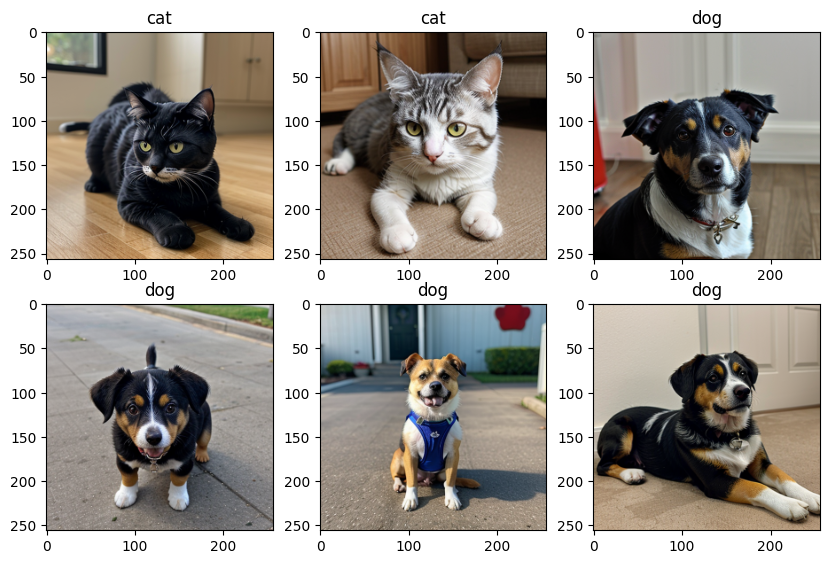

In [8]:
import matplotlib.pyplot as plt

"""
The class_names variable contains the class names 'cat' and 'dog', which we will use to 
replace the numeric labels 0 and 1 when displaying the images.
This helps us print 'cat' or 'dog' instead of numeric values.
"""
class_names = train_dataset.class_names  

# Let's retrieve a batch of images and labels from the dataset
# This retrieves one batch of data,containing normalize image array and corresponding labels.

for images, labels in train_ds.take(1): 
    plt.figure(figsize=(10, 10))
    for i in range(6):  # Displaying 6 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i]) 
        plt.title(class_names[labels[i]])  # Showing label cat or dog instead of 0 and 1
    plt.show()

# **2. Data Loading and Splitting Using tf.keras.preprocessing.image.ImageDataGenerator**

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# specifying the directory where the images of cats and dogs are stored.
data_dir = '/kaggle/input/dog-vs-cat/animal'

# Creating ImageDataGenerator object for training and validation
main_data = ImageDataGenerator(
    rescale=1./255,  # Here, we can directly normalize the pixel values of the images using this parameter.
    validation_split=0.2   # Splitting 20% of the data aside for validation.
)

In [10]:
# Loading training data set 
train_data = main_data.flow_from_directory(
    data_dir,
    target_size=(256, 256),  # Resize images to (256, 256)
    batch_size=32,           # Loading in batches of 32 images
    class_mode='binary',     # Useing binary labels for cat vs. dog which assign o for cat 1 for dog
    subset='training'        # Specify training subset
)

Found 800 images belonging to 2 classes.


In [11]:
# Loading validation data set
validation_data = main_data.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation'      # Specify validation subset
)

Found 200 images belonging to 2 classes.


In [12]:
# Checking the data types, classes and imageshape 
print(type(train_dataset))         
print(type(validation_dataset)) 
print(train_data.class_indices)
print(train_data.image_shape)

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
{'cat': 0, 'dog': 1}
(256, 256, 3)


In [13]:
images, labels = next(train_data)  # checking type of images 
print(type(images[0])) 

<class 'numpy.ndarray'>


**train_data contains batches of images and labels, which can be accessed using indexing train_data[0] or by using next(train_data) to retrieve the next batch.**

In [14]:
train_data[0][1]  #this will return first batch labels 

#train_data[0][0]  # this will return first batch all images nd array 

array([1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.],
      dtype=float32)

In [15]:
image, label =train_data[0]  #taking first batch 

# Checkin shapes of image and labels 
print(images.shape) 
print(labels.shape)  

(32, 256, 256, 3)
(32,)


As we can see, in this method both the validation and training datasets are same data type **tf.data.Dataset**,  and containing **arrays of images and labels** of data accordingly.

As we see above here image type is **a NumPy ndarray**.(Because we have alrady normalized our images using pre- build parameter of ImageDataGenrator class) This class has also different functions; for example, if you want to check the files, just write **train_data.filesname** which will print a list of files name.

**However, we don't need to normalize the data here because we have already normalized it using the built-in parameters in the object class. Therefore, we can directly use the training and validation datasets for model training.**

For more details, refer to the official documentation using below link: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

**Note:** We will use this same library for data augmentation 

**LET'S PRINT SOME IMAGES**

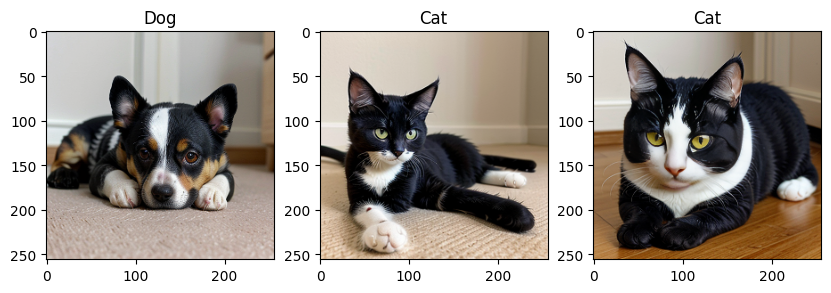

In [16]:
# Displaying 3 images from the training dataset
plt.figure(figsize=(10, 10))
for i in range(3):  # Displaying 3 images
    images, labels = train_data[0]  # printing images from first batch
    ax = plt.subplot(1, 3, i + 1)   
    plt.imshow(images[i])            
    plt.title('Cat' if labels[i] == 0 else 'Dog')  
plt.show() 

# Fitting a CNN Model

In [17]:
import warnings

# Ignore UserWarning messages
warnings.filterwarnings("ignore", category=UserWarning)

In [18]:
#Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt 

In [19]:
model = Sequential()

#Applying 3*3 filters for all convolutional Layer and padding is valid for both Conv2d and Maxpooling

model.add(Conv2D(32, kernel_size =(3,3), padding="valid", activation='relu',input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))   
          
model.add(Conv2D(64, kernel_size =(3,3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))  
    
model.add(Flatten())  #Flatten the output for the dense layers

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))  #Using Sigmoid for binary classification 

In [20]:
model.summary()  #checking model summary to anlayse the trainable parameters 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    31,490,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,517,889 (120.23 MB)

 Trainable params: 31,517,889 (120.23 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Compiling the model with the Adam optimizer, binary cross-entropy loss for binary classification, 
#and accuracy as the evaluation metric.

In [22]:
history= model.fit(train_data, epochs=10, validation_data=validation_data)

# Training the model on the training dataset for 10 epochs and validating using the validation dataset.

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.5191 - loss: 1.3255 - val_accuracy: 0.8300 - val_loss: 0.4600
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.8224 - loss: 0.4167 - val_accuracy: 0.8800 - val_loss: 0.2977
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9488 - loss: 0.1601 - val_accuracy: 0.9400 - val_loss: 0.1816
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9922 - loss: 0.0425 - val_accuracy: 0.9350 - val_loss: 0.1726
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 1.0000 - loss: 0.0107 - val_accuracy: 0.9350 - val_loss: 0.2125
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9400 - val_loss: 0.2180
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 1.0000 - loss: 5.1638e-04 - val_accuracy: 0.9350 - val_loss: 0.2161
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 1.0000 - loss: 2.4966e-04 - val_accuracy: 0.9300 - v

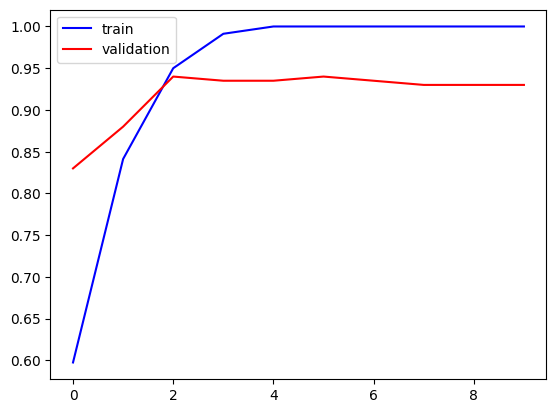

In [23]:
# Ploting Grabh of traing accuracy and validation accuracy w.r.t epochs

plt.plot(history.history['accuracy'],color='blue', label='train')
plt.plot(history.history['val_accuracy'],color='red', label='validation')
plt.legend()
plt.show()

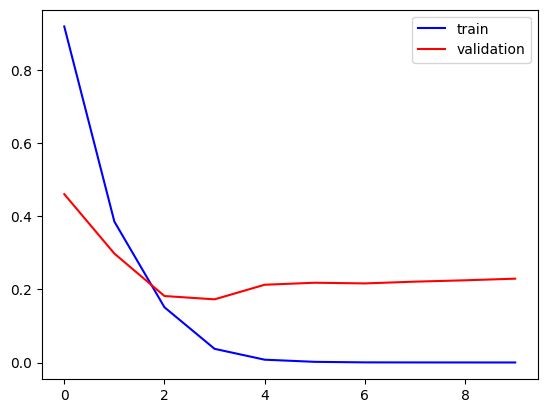

In [24]:
# Ploting Grabh of traing loss and validation loss w.r.t epochs

plt.plot(history.history['loss'],color='blue', label='train')
plt.plot(history.history['val_loss'],color='red', label='validation')
plt.legend()
plt.show()

# Observation:

**The model achieved 100% training accuracy while the validation accuracy is at 90%. This indicates that the model has memorized the training data but struggles to predict on unseen data, showing signs of overfitting.**

**To Mitigate this overfitting we can try:**

1. Regularization
2. Dropout layes 
3. Data Augmentation
4. Early Stopping 
5. Batch Normalization
6. Reduce Model Complexity 
7. More Data: we can increase the training data 

# Applying Data Augmentation

**Here, I am creating two separate ImageDataGenerator objects: one for the training data with data augmentation applied and another for the validation data without any augmentation. Otherwise, everything is the same as in the above code where you have generated the training and validation data.**

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Specifying the directory where the images of cats and dogs are stored.
data_dir = '/kaggle/input/dog-vs-cat/animal'

# Creating ImageDataGenerator object for training with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values 0 to 1
    rotation_range=20,  # Randomly rotate images in the range 0-20 degrees
    width_shift_range=0.2,  # Randomly translate images horizontally
    shear_range=0.2,  # Shear intensity
    zoom_range=0.2,  # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images horizontally
    validation_split=0.2,   # Splitting 20% of the data aside for validation.
)



# Creating ImageDataGenerator object for validation without augmentation
validation_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values 0 to 1
    validation_split=0.2,   # Splitting 20% of the data aside for validation
)

In [26]:
# Loading training dataset with augmentation
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),  
    batch_size=32,           
    class_mode='binary',     
    subset='training'        # Specify training subset
)

# Loading validation dataset without augmentation
validation_data = validation_datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation'      # Specify validation subset
)


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


# Fitting the same model on augmented training data with 15 epochs

In [27]:
history= model.fit(train_data, epochs=15, validation_data=validation_data)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.7951 - loss: 0.6198 - val_accuracy: 0.8900 - val_loss: 0.3068
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8621 - loss: 0.3432 - val_accuracy: 0.9400 - val_loss: 0.1929
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8758 - loss: 0.2957 - val_accuracy: 0.9650 - val_loss: 0.1168
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9059 - loss: 0.2574 - val_accuracy: 0.9600 - val_loss: 0.1676
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9210 - loss: 0.1991 - val_accuracy: 0.9550 - val_loss: 0.1393
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.9121 - loss: 0.2214 - val_accuracy: 0.9550 - val_loss: 0.1439
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9444 - loss: 0.1922 - val_accuracy: 0.9700 - val_loss: 0.1003
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9424 - loss: 0.1393 - val_accuracy: 0.9650 - val_loss:

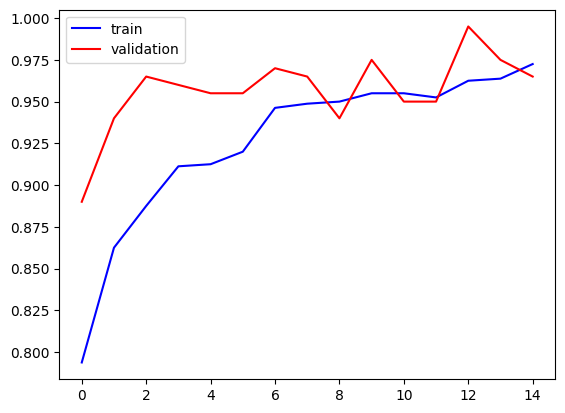

In [28]:
# Ploting Grabh of traing accuracy and validation accuracy w.r.t epochs

plt.plot(history.history['accuracy'],color='blue', label='train')
plt.plot(history.history['val_accuracy'],color='red', label='validation')
plt.legend()
plt.show()

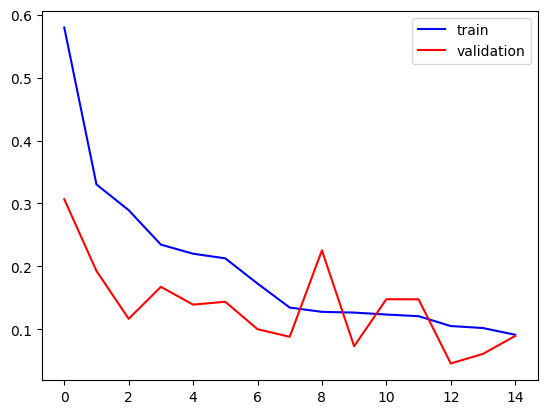

In [29]:
# Ploting Grabh of traing loss and validation loss w.r.t epochs

plt.plot(history.history['loss'],color='blue', label='train')
plt.plot(history.history['val_loss'],color='red', label='validation')
plt.legend()
plt.show()

# Comparison:

**Before Data Augmentation:**

* Training Accuracy: 100%
* Validation Accuracy: Around 89.5% to 90%
* Validation Loss: Gradually increasing, reaching 0.3267 by the final epoch.

This indicates overfitting, as the model is performing perfectly on the training data but struggling to generalize to unseen validation data.

**After Data Augmentation:**

* Training Accuracy: Started at 89.2% and improved to 97.1% by the final epoch.
* Validation Accuracy: Improved, starting at 92.0% and reaching as high as 98.5%.
* Validation Loss: Dropped significantly, reaching as low as 0.0550 and ending at 0.0777.

**Conclusion:**

After applying data augmentation, the model's generalization improved significantly. The training accuracy is slightly lower (as expected with more challenging data), but the validation accuracy and loss have improved. The model is no longer overfitting and is now performing better on unseen data, showing it has learned more robust and generalizable features.

# Applying Transfer Learning 

We will use the pre-trained VGG16 model as the foundation for our transfer learning. We will load the VGG16 model without its top layers (setting include_top=False) and we will add our own custom dense layers.

Firstly, we will freeze all the parameters of the VGG16 model. This means we will keep the weights from the pre-trained model the same while we train our new layers. Later we will unfreeze some layers parameter if required further improvment. 

In [30]:
from keras.applications.vgg16 import VGG16  # Importing VGG16


# Loading VGG16 pre-trained model without the top dense layers
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freezing the VGG16 model parameters
#vgg16_model.trainable = False

for layer in vgg16_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [31]:
vgg16_model.summary()  #Checking summary of VGG16 Model

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [32]:
# Creating a new Sequential model and adding the VGG16 model as a base
model2 = Sequential(layers=vgg16_model.layers)

# Flatten the output of VGG16 to feed it into dense layers
model2.add(Flatten())

# Add custom fully connected layers
model2.add(Dense(128, activation='relu'))  # Hidden layer
model2.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

In [33]:
# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Printing the model summary
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,909,249 (72.13 MB)

 Trainable params: 4,194,561 (16.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [34]:
history= model2.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 380s 15s/step - accuracy: 0.7608 - loss: 0.9451 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 377s 15s/step - accuracy: 0.9876 - loss: 0.0281 - val_accuracy: 0.9900 - val_loss: 0.0177
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 377s 15s/step - accuracy: 0.9892 - loss: 0.0346 - val_accuracy: 1.0000 - val_loss: 9.1668e-04
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 376s 15s/step - accuracy: 0.9929 - loss: 0.0192 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 376s 15s/step - accuracy: 0.9956 - loss: 0.0149 - val_accuracy: 1.0000 - val_loss: 2.1700e-04


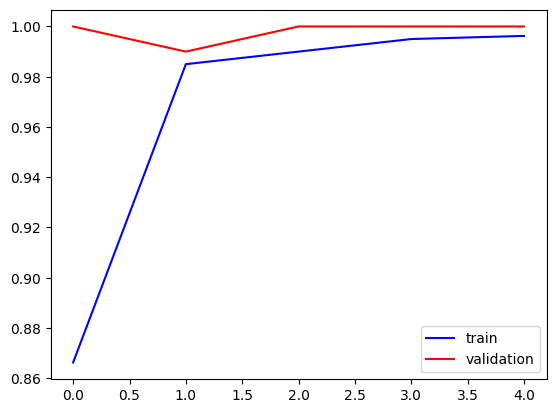

In [35]:
# Ploting Grabh of traing accuracy and validation accuracy w.r.t epochs

plt.plot(history.history['accuracy'],color='blue', label='train')
plt.plot(history.history['val_accuracy'],color='red', label='validation')
plt.legend()
plt.show()

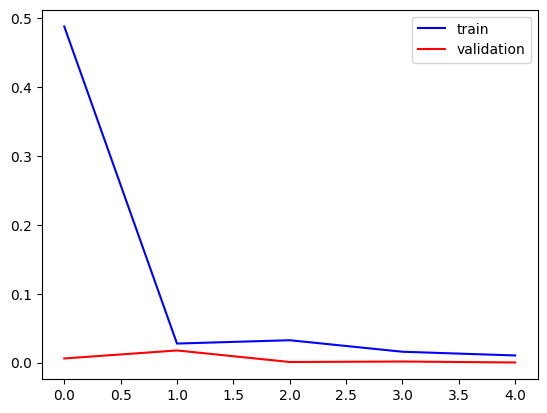

In [36]:
# Ploting Grabh of traing loss and validation loss w.r.t epochs

plt.plot(history.history['loss'],color='blue', label='train')
plt.plot(history.history['val_loss'],color='red', label='validation')
plt.legend()
plt.show()

# Conclusion:

**After training the VGG16 model for 5 epochs, the training accuracy started at 58.43% and increased to 99.94% by the end. The validation accuracy was also high, starting at 98.00% and reaching 100% by the third epoch. This shows that the model learned well and performed effectively on new data. Now we have a model that reached 100% accuracy on the validation data. This means it did very well during testing however real-world data may differ, so we should keep evaluating the model.**

# Thank You for Viewing!

**Thank you for taking the time to explore my project! I hope you found it insightful. I would love to hear your thoughts or suggestions on how I can improve this work further. Your feedback is invaluable to me as I continue to learn and grow in this field. Please feel free to share your ideas or any questions you may have!**

**Happy coding!**